For RHP-zero 4.0 the general condition is Abs(0.832050294337844*k - 0.554700196225229) < 1
For k=1, |yzH.gd(4.0)| is 0.2773500981126146 < 1
For acceptable control, k should be in the range [-0.535183758487996, 1.86851709182133].
The plant is not input-output controllable if k < -0.535183758487996 or k > 1.86851709182133.


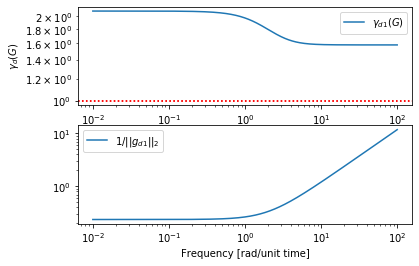

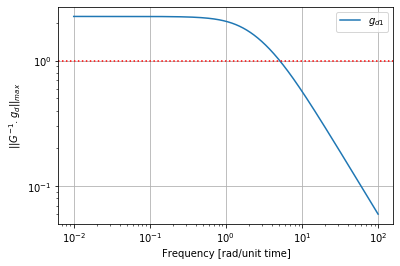

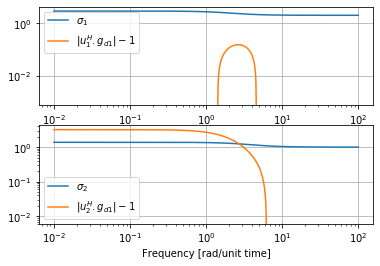

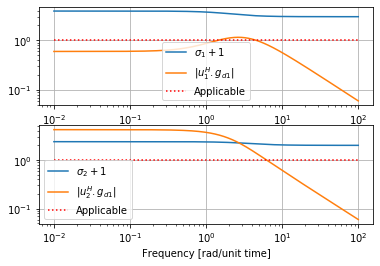

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from utilsplot import dis_rejctn_plot, input_perfect_const_plot, input_acceptable_const_plot
from utils import distRHPZ, tf, mimotf

s = tf([1, 0])

G11 = (s - 1) / (s + 2)
G12 = 4 / (s + 2)
G21 = 4.5 / (s + 2)
G22 = 2 * (s - 1) / (s + 2)

G = mimotf([[G11, G12],
            [G21, G22]])

def Gdk(s, k):
    return 6 / (s + 2) * np.matrix([[k],[1]])

def Gd(s):
    k = 1
    return Gdk(s, k)

def Gdz(s):
    k = sp.Symbol('k',real=True)
    return Gdk(s, k)

z_vec = G.zeros()
for z in z_vec:
    if z > 0:
        eq = distRHPZ(G, Gdz, z)
        print('For RHP-zero {0} the general condition is {1} < 1'.format(z, eq))
        print('For k=1, |yzH.gd({0})| is {1} < 1'.format(z, distRHPZ(G, Gd, z)))
        k = sp.Symbol('k',real=True)
        k_range = sp.solve(eq - 1)
        print('For acceptable control, k should be in the range {0}.'.format(k_range))
        print('The plant is not input-output controllable if k < {0} or k > {1}.'.format(k_range[0], k_range[1]))

# The section below demonstrates more utilsplot functions

plt.figure('Disturbance rejection example')
dis_rejctn_plot(G, Gd)

plt.figure('Input constraints for perfect control example')
input_perfect_const_plot(G, Gd)

plt.figure('Input constraints for acceptable control example')
input_acceptable_const_plot(G, Gd)

plt.figure('Input constraints for acceptable control (modified) example')
input_acceptable_const_plot(G, Gd, modified=True)

plt.show()

